In [1]:
from __future__ import division
from IPython.display import display, Math, Latex
from math import sin, cos
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, LinearLocator, NullFormatter, NullLocator, MultipleLocator
import matplotlib.ticker
import matplotlib.colors
from matplotlib.font_manager import FontProperties
from matplotlib import rc, text
from scipy.stats import norm
import scipy as sp
from scipy.integrate import simps
from numpy import trapz

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
c=2.99792458*(10**8)
G=6.67428*(10**(-11))
s_mass=G*(1.98892*10**(30))/(c**3)

# common function shortcuts
log10 = np.log10
pi = np.pi
sqrt = np.sqrt

In [3]:
wzp = -0.029 # Quasar Correction; defined in Bailor-Jones but computed in Lindegren et al. 2018

In [4]:
# Posterior PDF from Bailor-Jones et al.

def pOfR(r, px, dpx, Lsph):
    """
    This is Equation 2 in Bailer-Jones et al. 2018.
    NB, r > 0
    Here, input r in pc's.
    """
    r = r/1000. #convert pc to kpc
    #px = px + 0.029 #Quasar correction already accounted for 
    exponent = -r/Lsph - (px-wzp-1/r)**2/(2*dpx**2)
    ans = r**2*np.exp(exponent)
    return ans


In [5]:
# plotting preamble

fig_width_pt = 245.27 #513.17           # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

params = {'backend': 'pdf',
        'axes.labelsize': 7,
        'lines.markersize': 2,
        'font.size': 7,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.0,
        'legend.fontsize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'savefig.dpi':200,
        'path.simplify':True,
        #'font.family': 'serif',
        'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True,
        #'axes.color_cycle': ['b', 'lime', 'r', 'purple', 'g', 'c', 'm', 'orange', 'darkblue', \
        #                        'darkcyan', 'y','orangered','chartreuse','brown','deeppink','lightgreen', 'k'],
        #'font.serif':cm,
        'figure.figsize': fig_size}
plt.rcParams.update(params)

# J1732 parallax measurements

In [6]:
# dispersion measure distance from NE 2001, https://www.nrl.navy.mil/rsd/RORF/ne2001/pulsar.cgi
d_DM_NE_1732 = 1411
eplus_DM_NE_1732 = 206
eminus_DM_NE_1732 = 198

# YMW 16 DM model, http://www.atnf.csiro.au/research/pulsar/ymw16/
d_DM_YMW_1732 = 1875.0   # no errors reported here...

In [7]:
# GAIA estimate placeholder J1955
# NB negative parallax -1.1837	2.8444
gx1732 = np.linspace(.17, 1.5, 1000)
dist_gaia1732 = norm(-1.1837, 2.8444)

In [8]:
# Corrected Bailer-Jones distance estimate
dist_BJ_1732 = np.linspace(500, 12000, 1000)
bj_1732 = []
for r in dist_BJ_1732:
    bj_1732.append(pOfR(r,-1.1837, 2.8444,1.94743888544794))

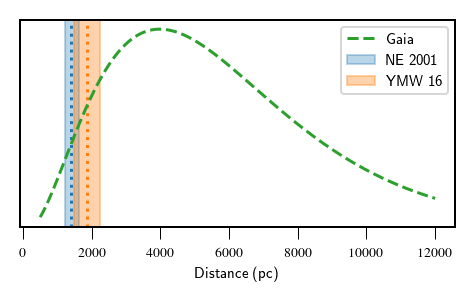

In [9]:
fig, ax1 = plt.subplots()

# DM NE 2001 model
ax1.axvspan(d_DM_NE_1732 - eminus_DM_NE_1732, d_DM_NE_1732 + eplus_DM_NE_1732, alpha=0.3, color = "C0", label = "NE 2001")
plt.axvline(d_DM_NE_1732, ymin=0, ymax=1, color = "C0", linestyle =":")

# DM YMW16 model
ax1.axvspan(d_DM_YMW_1732*.8, d_DM_YMW_1732*1.2, alpha=0.35, color = "C1", label = "YMW 16")
plt.axvline(d_DM_YMW_1732, ymin=0, ymax=1, color = "C1", linestyle =":")

# GAIA distance, to be updated
#plt.plot(1/gx1732*1000, dist_gaia1732.pdf(gx1732), label = "GAIA", color = "C5", linestyle='dashed')
plt.plot(dist_BJ_1732, np.array(bj_1732), label = "Gaia", color = "C2", linestyle='dashed')

ax1.set_yticklabels([])
plt.yticks([])
plt.xlabel("Distance (pc)")
plt.legend()
plt.tight_layout()

#plt.savefig("J1732_distances_wbj.pdf")

In [26]:
# log transform
new1732 = []
for ii in bj_1732:
    new1732.append(10**(ii))

In [10]:
# Can now fit this with a Gaussian

In [11]:
# the following code was modified from 
# https://github.com/Ffisegydd/python-examples/blob/master/examples/scipy/fitting%20a%20gaussian%20with%20scipy%20curve_fit.py

In [17]:
from scipy.optimize import curve_fit

In [27]:
newx = (dist_BJ_1732/1000)
newy = new1732

In [28]:
# Create a function which returns a Gaussian (normal) distribution.
def gauss(x, *p):
    a, b, c, d = p
    y = a*np.exp(-np.power((x - b), 2.)/(2. * c**2.)) + d
    return y

In [29]:
p_initial = [1.0, 4.0, 2.0, 0.0]

In [30]:
popt, pcov = curve_fit(gauss, newx, newy, p0=p_initial)

In [31]:
y_fit = gauss(newx, *popt)

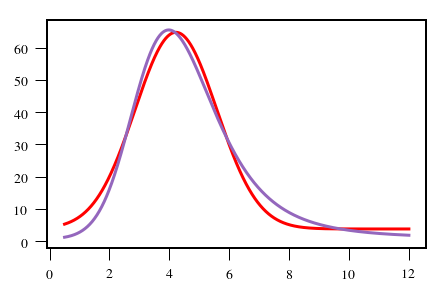

In [32]:
fig, ax = plt.subplots()
ax.plot(newx, y_fit, color = 'red')
plt.plot(dist_BJ_1732/1000, newy  , label = "Combined", color = "C4", linestyle='solid')

In [33]:
# mean distance from fit
popt[1]*1000

4219.627405177047

In [34]:
# 1-sigma error on distance fit
popt[2]*1000

1365.6522778136632